In [763]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
scaler = StandardScaler()
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [764]:
vehicle_df = pd.read_csv('vehicle.csv')

In [765]:
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [766]:
print("The dataframe has {} rows and {} columns".format(vehicle_df.shape[0],vehicle_df.shape[1]))

The dataframe has 846 rows and 19 columns


In [767]:
#display the information of dataframe
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [768]:
vehicle_df.apply(lambda x: sum(x.isnull()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [769]:
vehicle_df[pd.isnull]

compactness  circularity  distance_circularity  radius_ratio  \
0            NaN          NaN                   NaN           NaN   
1            NaN          NaN                   NaN           NaN   
2            NaN          NaN                   NaN           NaN   
3            NaN          NaN                   NaN           NaN   
4            NaN          NaN                   NaN           NaN   
5            NaN          NaN                   NaN           NaN   
6            NaN          NaN                   NaN           NaN   
7            NaN          NaN                   NaN           NaN   
8            NaN          NaN                   NaN           NaN   
9            NaN          NaN                   NaN           NaN   
10           NaN          NaN                   NaN           NaN   
11           NaN          NaN                   NaN           NaN   
12           NaN          NaN                   NaN           NaN   
13           NaN          NaN                   NaN           NaN   
14           NaN          NaN                   NaN           NaN   
15           NaN          NaN                   NaN           NaN   
16           NaN          NaN                   NaN           NaN   
17           NaN          NaN                   NaN           NaN   
18           NaN          NaN                   NaN           NaN   
19           NaN          NaN                   NaN           NaN   
20           NaN          NaN                   NaN           NaN   
21           NaN          NaN                   NaN           NaN   
22           NaN          NaN                   NaN           NaN   
23           NaN          NaN                   NaN           NaN   
24           NaN          NaN                   NaN           NaN   
25           NaN          NaN                   NaN           NaN   
26           NaN          NaN                   NaN           NaN   
27           NaN          NaN                   NaN           NaN   
28           NaN          NaN                   NaN           NaN   
29           NaN          NaN                   NaN           NaN   
..           ...          ...                   ...           ...   
816          NaN          NaN                   NaN           NaN   
817          NaN          NaN                   NaN           NaN   
818          NaN          NaN                   NaN           NaN   
819          NaN          NaN                   NaN           NaN   
820          NaN          NaN                   NaN           NaN   
821          NaN          NaN                   NaN           NaN   
822          NaN          NaN                   NaN           NaN   
823          NaN          NaN                   NaN           NaN   
824          NaN          NaN                   NaN           NaN   
825          NaN          NaN                   NaN           NaN   
826          NaN          NaN                   NaN           NaN   
827          NaN          NaN                   NaN           NaN   
828          NaN          NaN                   NaN           NaN   
829          NaN          NaN                   NaN           NaN   
830          NaN          NaN                   NaN           NaN   
831          NaN          NaN                   NaN           NaN   
832          NaN          NaN                   NaN           NaN   
833          NaN          NaN                   NaN           NaN   
834          NaN          NaN                   NaN           NaN   
835          NaN          NaN                   NaN           NaN   
836          NaN          NaN                   NaN           NaN   
837          NaN          NaN                   NaN           NaN   
838          NaN          NaN                   NaN           NaN   
839          NaN          NaN                   NaN           NaN   
840          NaN          NaN                   NaN           NaN   
841          NaN          NaN                   NaN           NaN   
842

In [770]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [771]:
vehicle_df.fillna(vehicle_df.median(),axis=0,inplace=True)

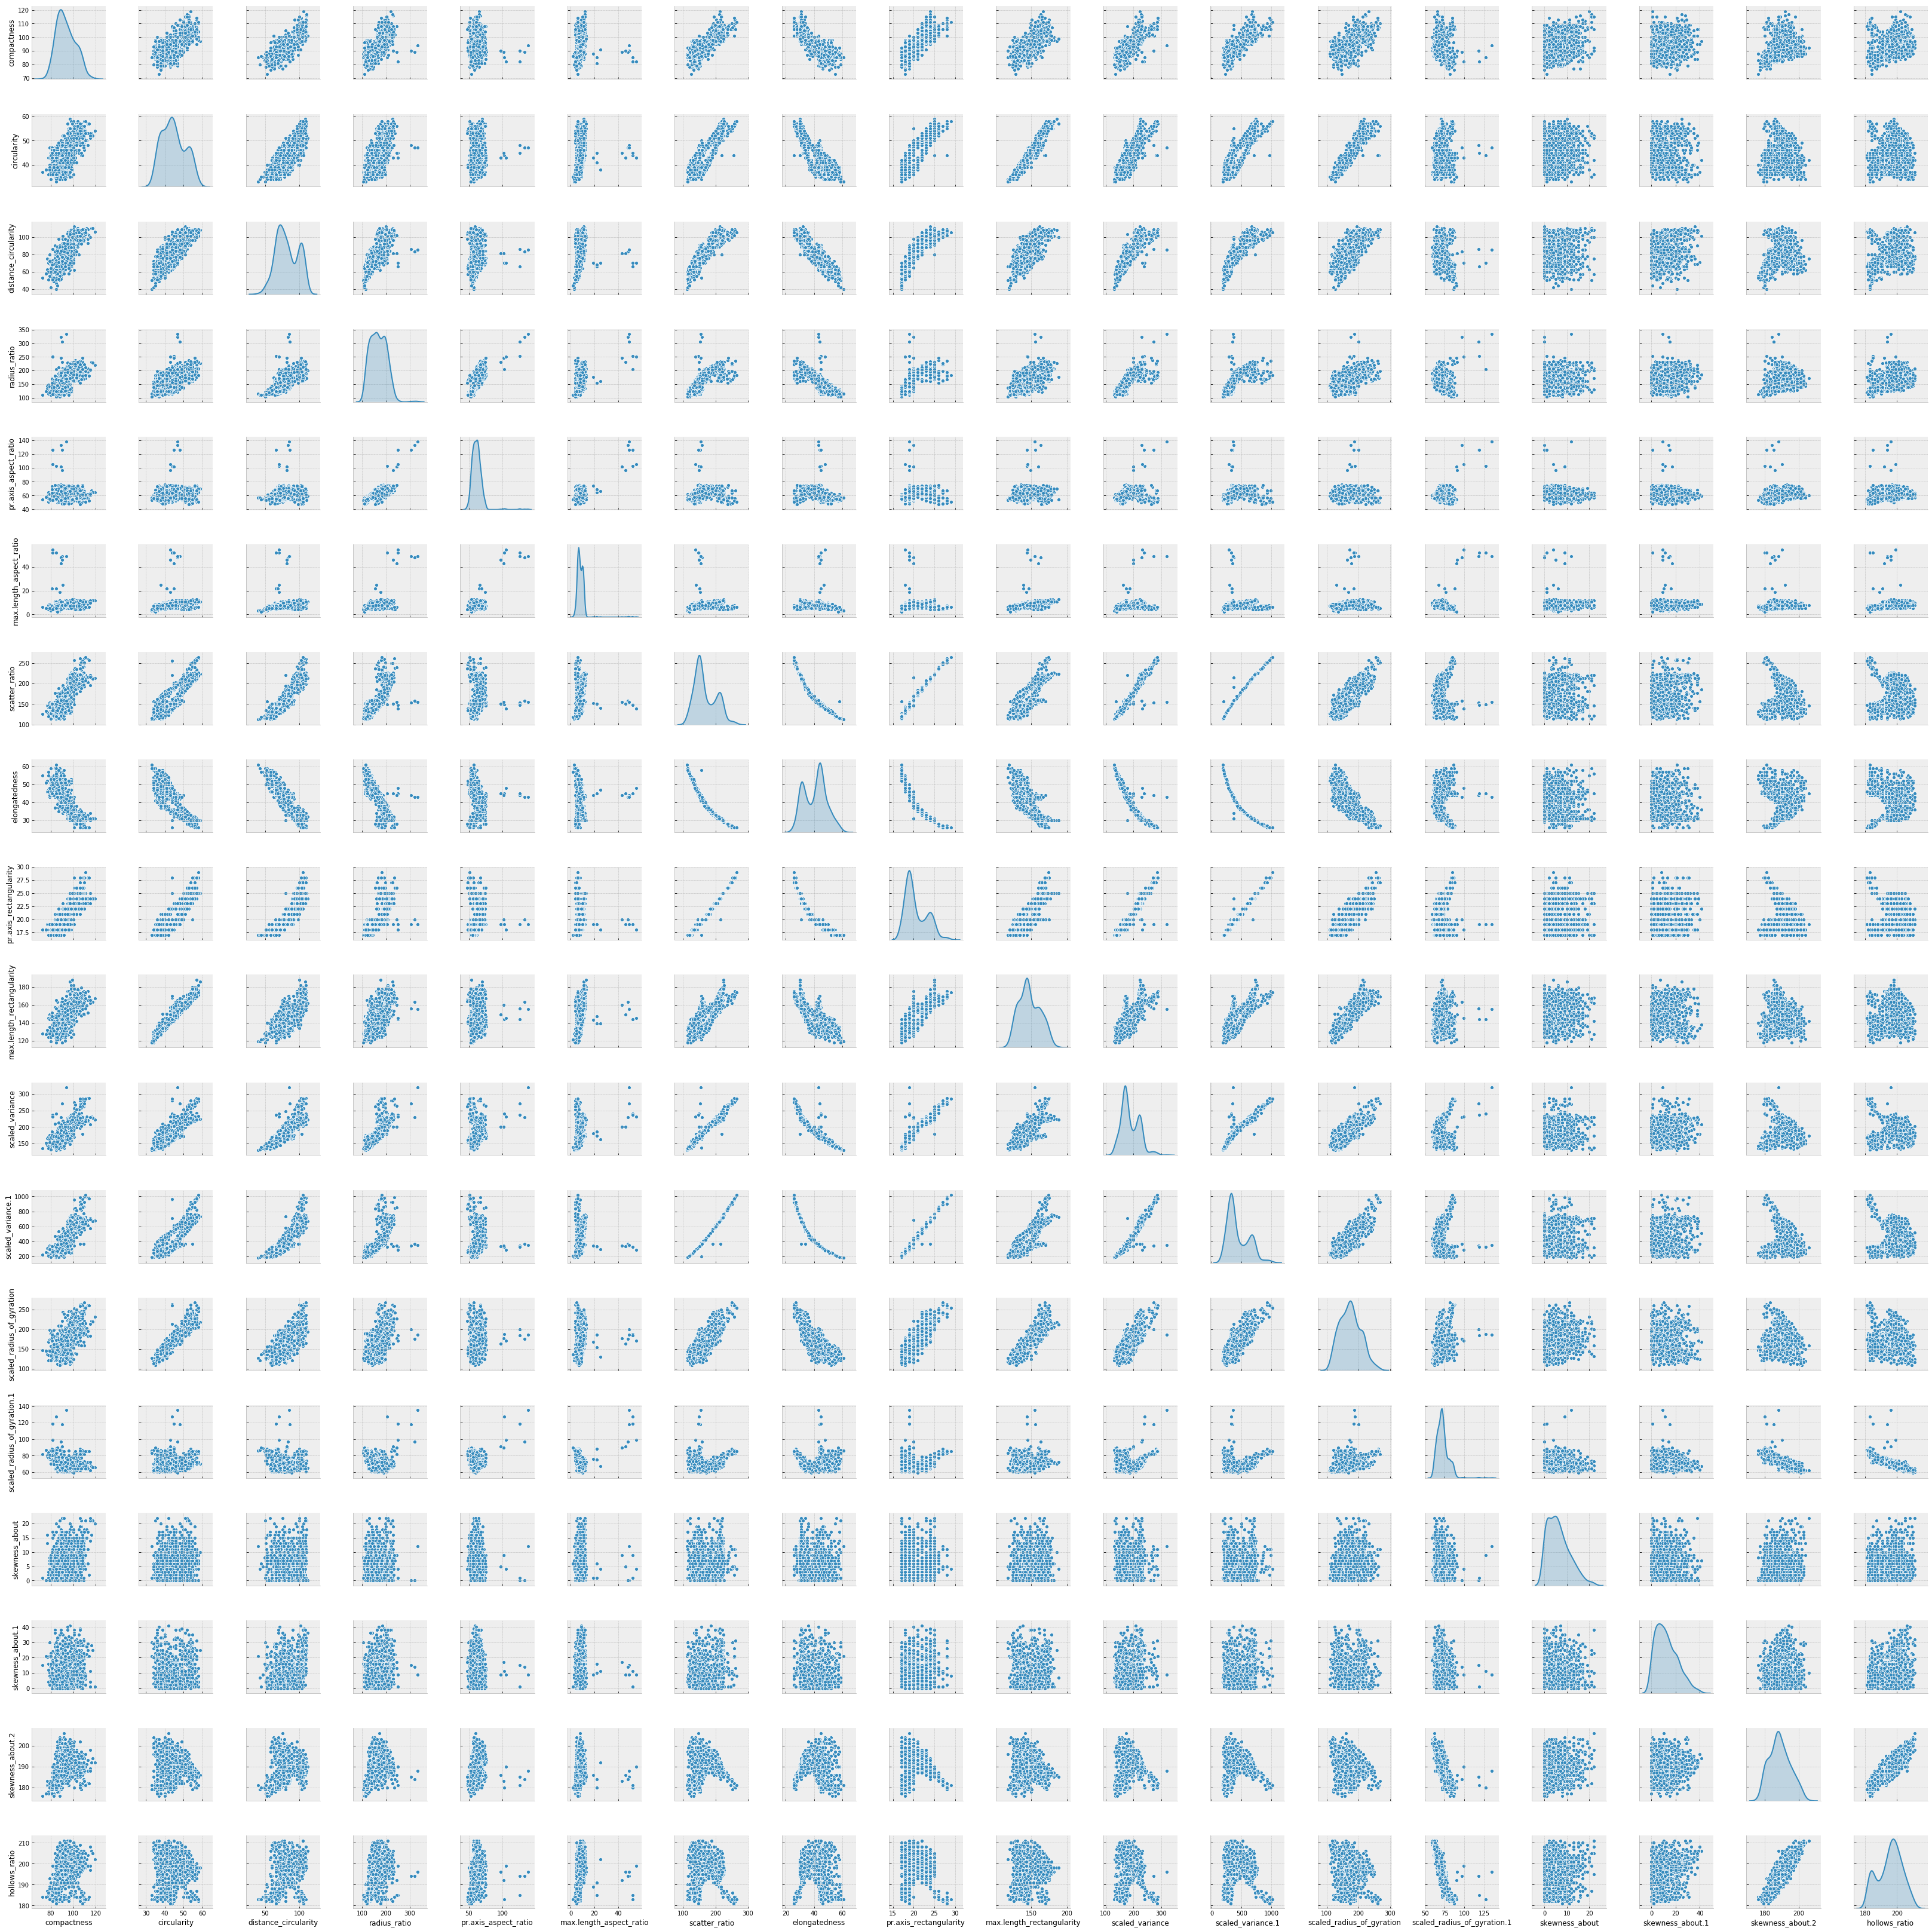

In [772]:
sns.pairplot(vehicle_df,diag_kind='kde')
plt.show()

In [773]:
#copy the dataframe to another dataframe and drop null/missing values from the newly created dataframe
new_vehicle_df = vehicle_df.copy()

In [774]:
#display the first 5 rows of new dataframe
new_vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [775]:
print("Shape of newly created dataframe:",new_vehicle_df.shape)

Shape of newly created dataframe: (846, 19)


In [776]:
#drop the null vaues from the new dataframe
new_vehicle_df.dropna(axis=0,inplace=True)

In [777]:
#now we will see what is the shape of dataframe
print("After dropping missing values shape of dataframe:",new_vehicle_df.shape)

After dropping missing values shape of dataframe: (846, 19)


In [778]:
#display 5 point summary of new dataframe
new_vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

Text(0.5, 1.0, 'Box Plot')

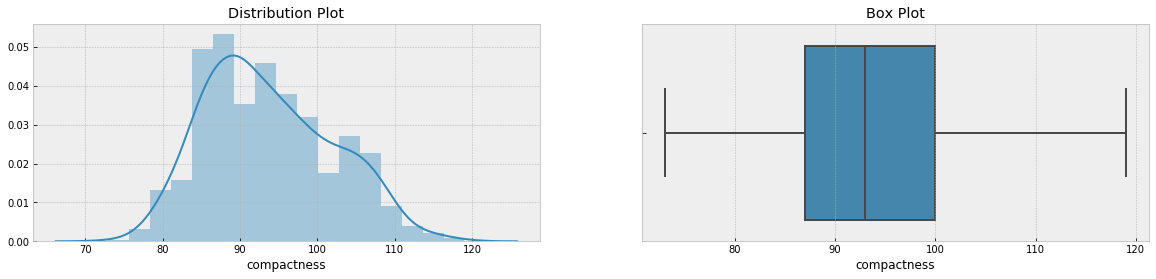

In [779]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['compactness'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

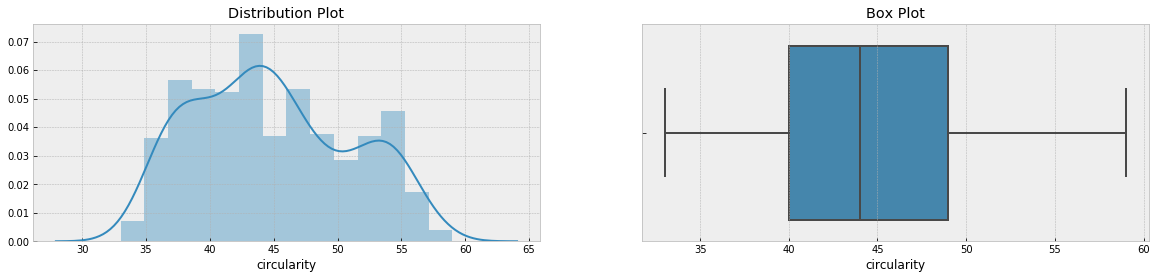

In [780]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['circularity'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

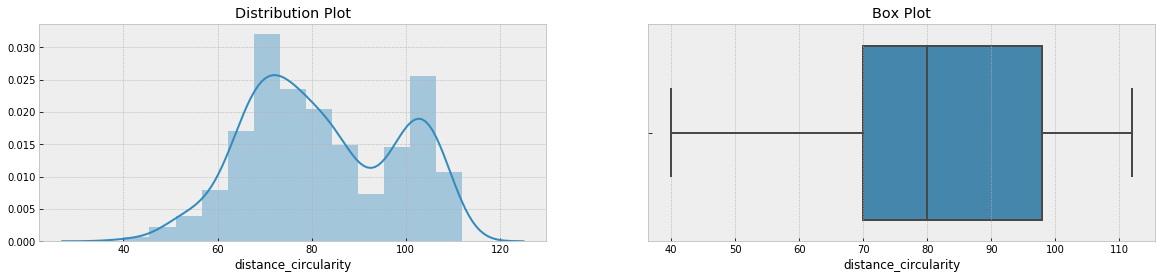

In [781]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

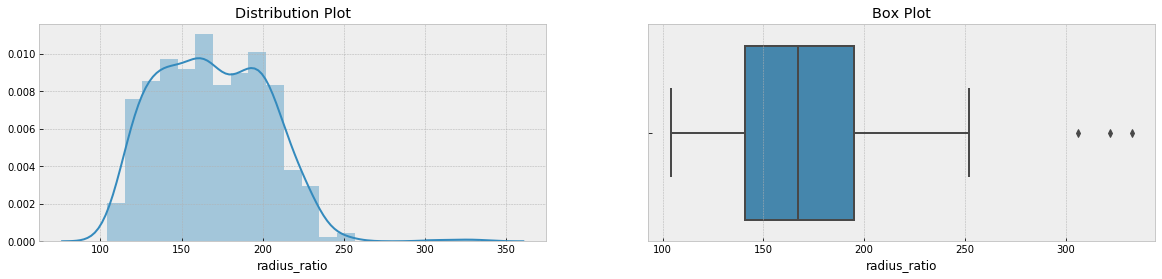

In [782]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

In [783]:
#check how many outliers are there in radius_ratio column
q1 = np.quantile(new_vehicle_df['radius_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['radius_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['radius_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("radius_ratio above",new_vehicle_df['radius_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in radius_ratio column are",new_vehicle_df[new_vehicle_df['radius_ratio']>276]['radius_ratio'].shape[0])

Quartie1:: 141.0
Quartie2:: 167.0
Quartie3:: 195.0
Inter Quartie Range:: 54.0
radius_ratio above 276.0 are outliers
The Outliers in radius_ratio column are 3


Text(0.5, 1.0, 'Box Plot')

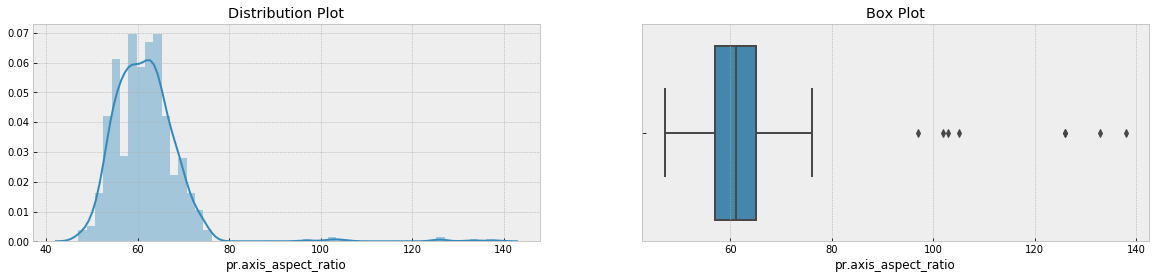

In [784]:
 fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

In [785]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("pr.axis_aspect_ratio above",new_vehicle_df['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in pr.axis_aspect_ratio column are",new_vehicle_df[new_vehicle_df['pr.axis_aspect_ratio']>77]['pr.axis_aspect_ratio'].shape[0])

Quartie1:: 57.0
Quartie2:: 61.0
Quartie3:: 65.0
Inter Quartie Range:: 8.0
pr.axis_aspect_ratio above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 8


Text(0.5, 1.0, 'Box Plot')

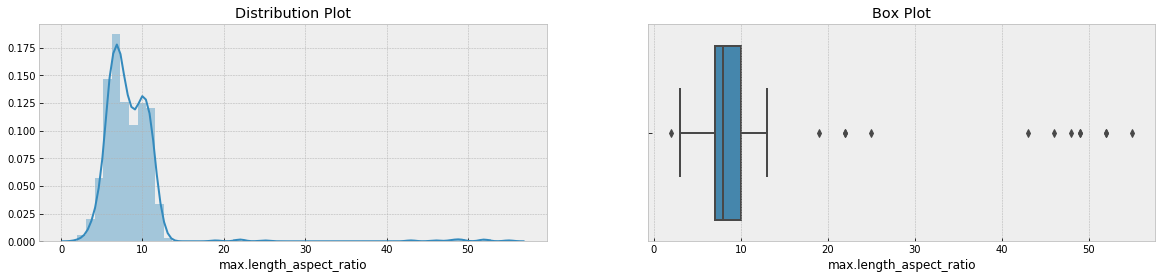

In [786]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

In [787]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("max.length_aspect_ratio above",new_vehicle_df['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("max.length_aspect_ratio below",new_vehicle_df['max.length_aspect_ratio'].quantile(0.25)-(1.5 * IQR),"are outliers")
print("The above Outliers in max.length_aspect_ratio column are",new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']>14.5]['max.length_aspect_ratio'].shape[0])
print("The below Outliers in max.length_aspect_ratio column are",new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']<2.5]['max.length_aspect_ratio'].shape[0])

Quartie1:: 7.0
Quartie2:: 8.0
Quartie3:: 10.0
Inter Quartie Range:: 3.0
max.length_aspect_ratio above 14.5 are outliers
max.length_aspect_ratio below 2.5 are outliers
The above Outliers in max.length_aspect_ratio column are 12
The below Outliers in max.length_aspect_ratio column are 1


Text(0.5, 1.0, 'Box Plot')

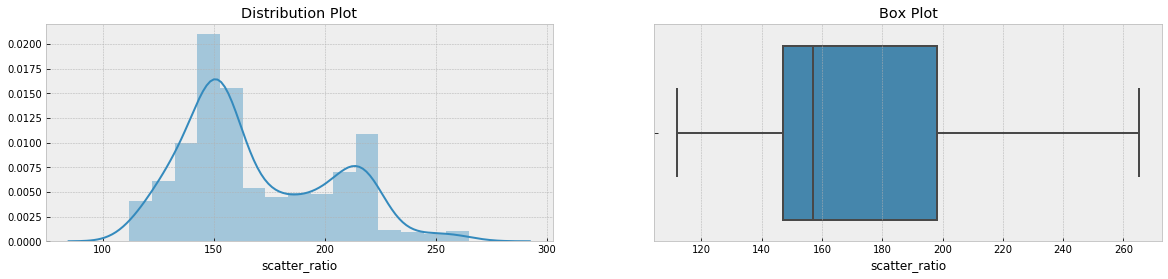

In [788]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

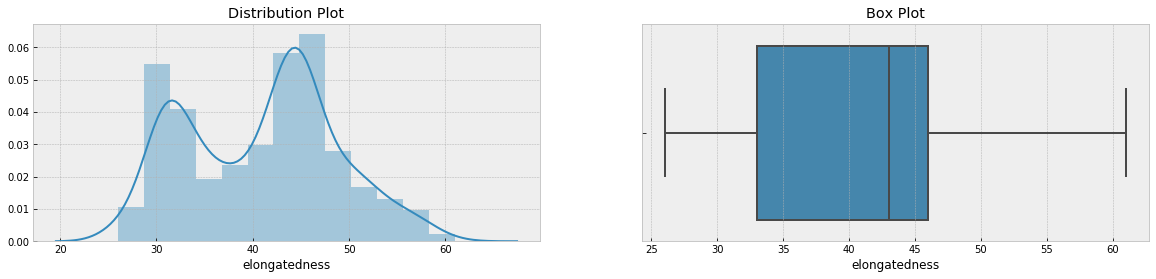

In [789]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

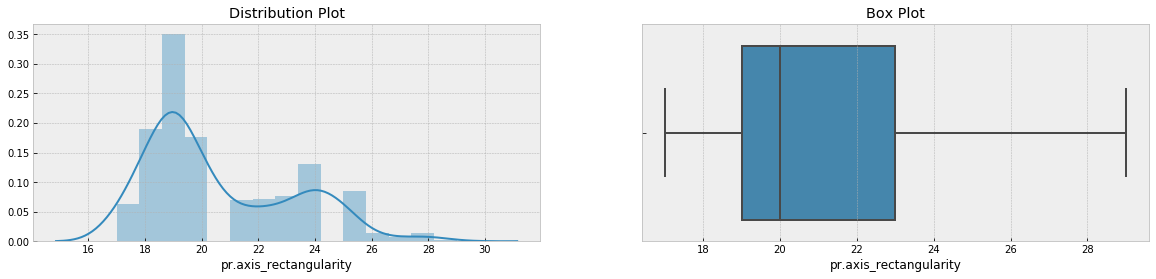

In [790]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

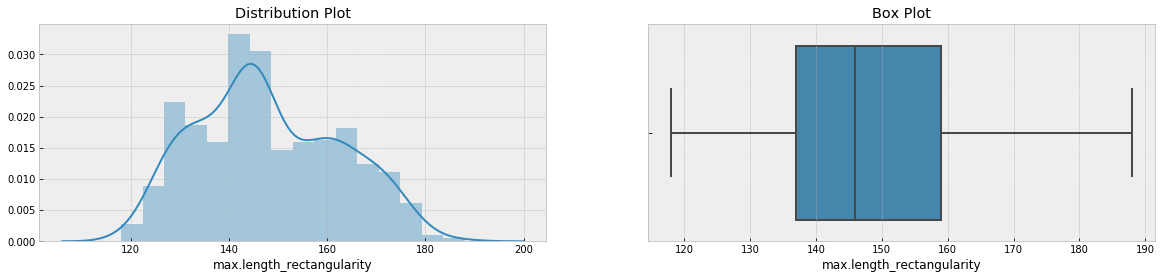

In [791]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

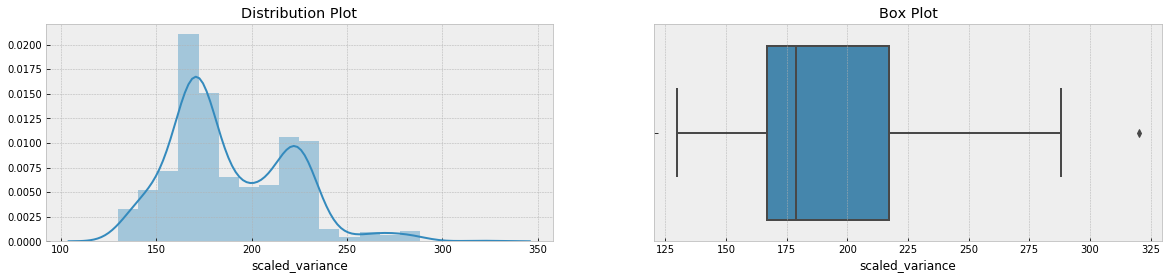

In [792]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

In [793]:
#check how many outliers are there in scaled_variance column
q1 = np.quantile(new_vehicle_df['scaled_variance'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_variance'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_variance'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance above",new_vehicle_df['scaled_variance'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance column are",new_vehicle_df[new_vehicle_df['scaled_variance']>292]['scaled_variance'].shape[0])

Quartie1:: 167.0
Quartie2:: 179.0
Quartie3:: 217.0
Inter Quartie Range:: 50.0
scaled_variance above 292.0 are outliers
The Outliers in scaled_variance column are 1


Text(0.5, 1.0, 'Box Plot')

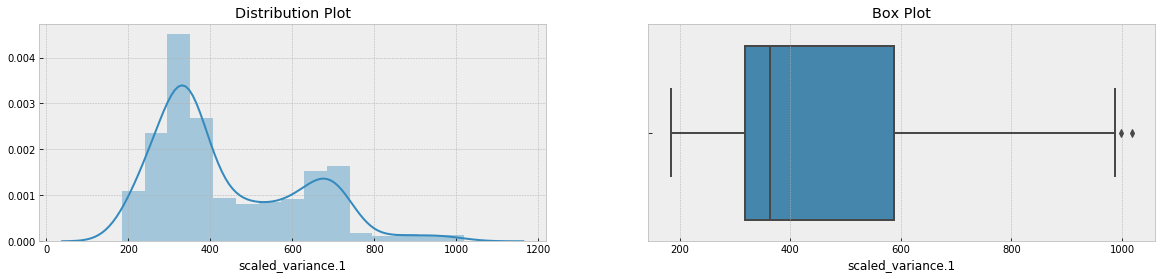

In [794]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

In [795]:
#check how many outliers are there in scaled_variance.1 column
q1 = np.quantile(new_vehicle_df['scaled_variance.1'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_variance.1'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_variance.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance.1 above",new_vehicle_df['scaled_variance.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance.1 column are",new_vehicle_df[new_vehicle_df['scaled_variance.1']>988]['scaled_variance.1'].shape[0])

Quartie1:: 318.25
Quartie2:: 363.5
Quartie3:: 586.75
Inter Quartie Range:: 268.5
scaled_variance.1 above 989.5 are outliers
The Outliers in scaled_variance.1 column are 2


Text(0.5, 1.0, 'Box Plot')

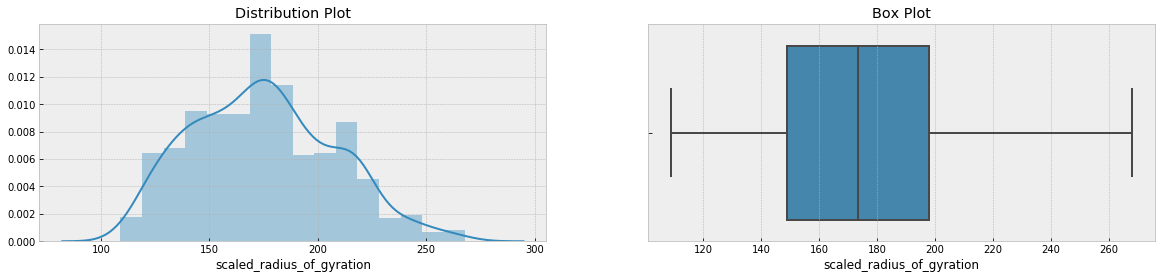

In [796]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

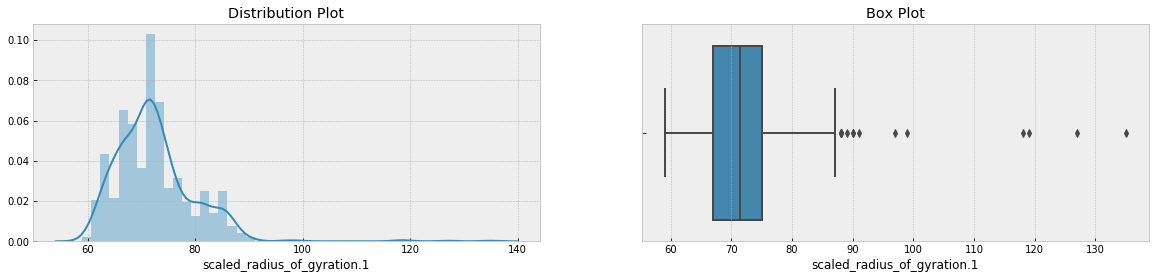

In [797]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

In [798]:
#check how many outliers are there in scaled_radius_of_gyration.1 column
q1 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_radius_of_gyration.1 above",new_vehicle_df['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_radius_of_gyration.1 column are",new_vehicle_df[new_vehicle_df['scaled_radius_of_gyration.1']>87]['scaled_radius_of_gyration.1'].shape[0])

Quartie1:: 67.0
Quartie2:: 71.5
Quartie3:: 75.0
Inter Quartie Range:: 8.0
scaled_radius_of_gyration.1 above 87.0 are outliers
The Outliers in scaled_radius_of_gyration.1 column are 15


Text(0.5, 1.0, 'Box Plot')

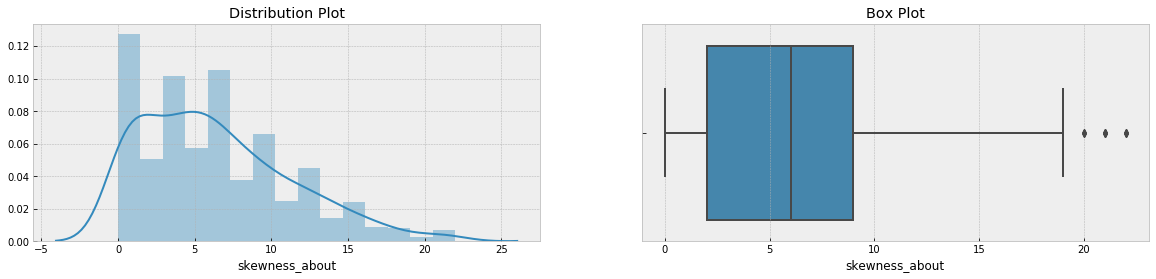

In [799]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

In [800]:
#check how many outliers are there in skewness_about column
q1 = np.quantile(new_vehicle_df['skewness_about'],0.25)
q2 = np.quantile(new_vehicle_df['skewness_about'],0.50)
q3 = np.quantile(new_vehicle_df['skewness_about'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about above",new_vehicle_df['skewness_about'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about column are",new_vehicle_df[new_vehicle_df['skewness_about']>19.5]['skewness_about'].shape[0])

Quartie1:: 2.0
Quartie2:: 6.0
Quartie3:: 9.0
Inter Quartie Range:: 7.0
skewness_about above 19.5 are outliers
The Outliers in skewness_about column are 12


Text(0.5, 1.0, 'Box Plot')

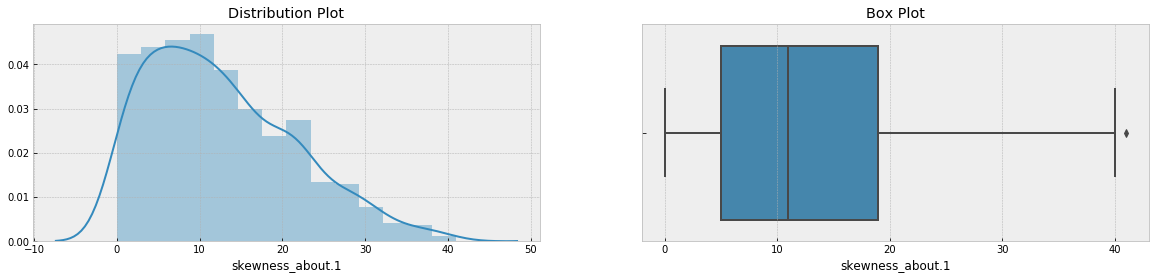

In [801]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

In [802]:
#check how many outliers are there in skewness_about.1 column
q1 = np.quantile(new_vehicle_df['skewness_about.1'],0.25)
q2 = np.quantile(new_vehicle_df['skewness_about.1'],0.50)
q3 = np.quantile(new_vehicle_df['skewness_about.1'],0.75)
IQR = q3-q1
print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about.1 above",new_vehicle_df['skewness_about.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about.1 column are",new_vehicle_df[new_vehicle_df['skewness_about.1']>38.5]['skewness_about.1'].shape[0])

Quartie1:: 5.0
Quartie2:: 11.0
Quartie3:: 19.0
Inter Quartie Range:: 14.0
skewness_about.1 above 40.0 are outliers
The Outliers in skewness_about.1 column are 3


Text(0.5, 1.0, 'Box Plot')

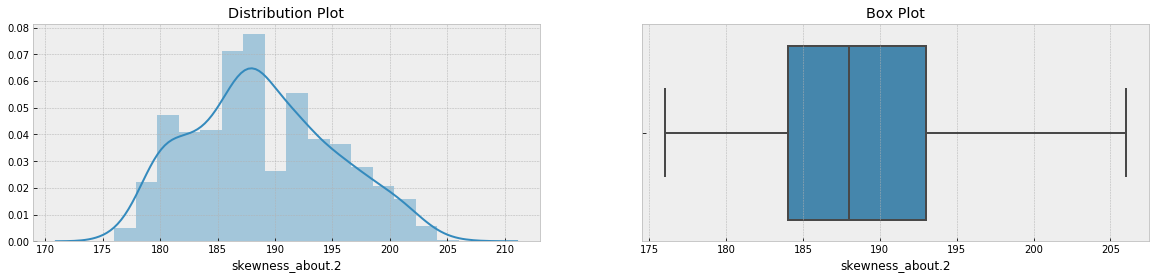

In [803]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

Text(0.5, 1.0, 'Box Plot')

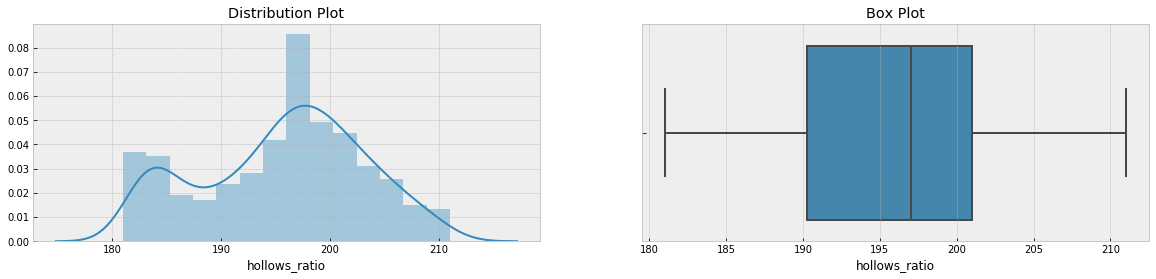

In [804]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

In [805]:
#display how many are car,bus,van. 
new_vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

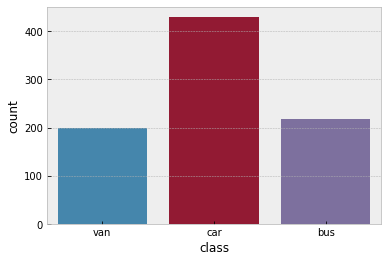

In [806]:
sns.countplot(new_vehicle_df['class'])
plt.show()

In [807]:
#radius_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['radius_ratio']>276].index,axis=0,inplace=True)

In [808]:
#pr.axis_aspect_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['pr.axis_aspect_ratio']>77].index,axis=0,inplace=True)

In [809]:
#max.length_aspect_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']>14.5].index,axis=0,inplace=True)
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']<2.5].index,axis=0,inplace=True)

In [810]:
#scaled_variance column outliers
new_vehicle_df[new_vehicle_df['scaled_variance']>292]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [811]:
#scaled_variance.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['scaled_variance.1']>988].index,axis=0,inplace=True)

In [812]:
#scaled_radius_of_gyration.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['scaled_radius_of_gyration.1']>87].index,axis=0,inplace=True)

In [813]:
#skewness_about column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['skewness_about']>19.5].index,axis=0,inplace=True)

In [814]:
#skewness_about.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['skewness_about.1']>38.5].index,axis=0,inplace=True)

In [815]:
#now what is the shape of dataframe
print("after removing outliers shape of dataframe:",new_vehicle_df.shape)

after removing outliers shape of dataframe: (811, 19)


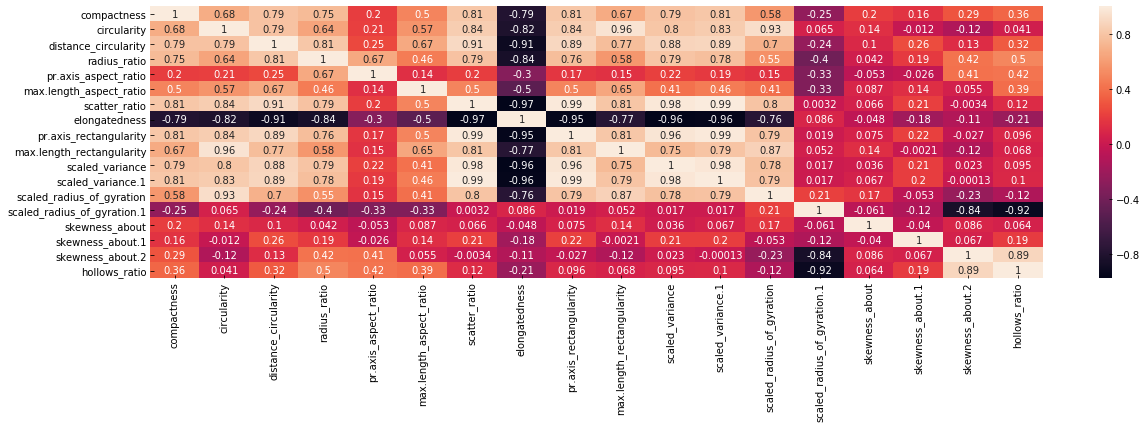

In [816]:
#find the correlation between independent variables
plt.figure(figsize=(20,5))
sns.heatmap(new_vehicle_df.corr(),annot=True)
plt.show()

In [817]:
#now separate the dataframe into dependent and independent variables
#Labels = new_vehicle_df['class']
#Labels_keys = Labels.unique().tolist()
#Labels = np.array(Labels)
new_vehicle_df_independent_attr = new_vehicle_df.drop('class',axis=1)
new_vehicle_df_dependent_attr = new_vehicle_df['class']
print("shape of new_vehicle_df_independent_attr::",new_vehicle_df_independent_attr.shape)
print("shape of new_vehicle_df_dependent_attr::",new_vehicle_df_dependent_attr.shape)

shape of new_vehicle_df_independent_attr:: (811, 18)
shape of new_vehicle_df_dependent_attr:: (811,)


In [818]:
#now sclaed the independent attribute and replace the dependent attr value with number
new_vehicle_df_independent_attr_scaled = new_vehicle_df_independent_attr.apply(zscore)
new_vehicle_df_dependent_attr.replace({'car':0,'bus':1,'van':2},inplace=True)

In [819]:
#make the covariance matrix and we have 18 independent features so aur covariance matrix is 18*18 matrix
cov_matrix = np.cov(new_vehicle_df_independent_attr_scaled,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00123457e+00  6.81021348e-01  7.87567084e-01  7.46739467e-01
   2.02667690e-01  4.96910623e-01  8.11519195e-01 -7.89160164e-01
   8.12497603e-01  6.75215645e-01  7.92165006e-01  8.13241942e-01
   5.80558866e-01 -2.52950585e-01  2.04004652e-01  1.57033969e-01
   2.95315433e-01  3.63195045e-01]
 [ 6.81021348e-01  1.00123457e+00  7.87775334e-01  6.42287935e-01
   2.07328034e-01  5.65826467e-01  8.45219307e-01 -8.17177356e-01
   8.41755038e-01  9.62403809e-01  8.04025056e-01  8.33793911e-01
   9.26476108e-01  6.53708439e-02  1.41637535e-01 -1.21850508e-02
  -1.15848786e-01  4.08520347e-02]
 [ 7.87567084e-01  7.87775334e-01  1.00123457e+00  8.09663237e-01
   2.47748521e-01  6.69423983e-01  9.06506118e-01 -9.09723978e-01
   8.95758190e-01  7.69289235e-01  8.85092496e-01  8.89041311e-01
   7.04492965e-01 -2.38782315e-01  1.01647926e-01  2.64186032e-01
   1.29482158e-01  3.22325259e-01]
 [ 7.46739467e-01  6.42287935e-01  8.09663237e-01  1.00123

In [820]:
#now with the help of above covariance matrix we will find eigen value and eigen vectors
pca_to_learn_variance = PCA(n_components=18)
pca_to_learn_variance.fit(new_vehicle_df_independent_attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [821]:
#display explained variance ratio
pca_to_learn_variance.explained_variance_ratio_

array([5.43522462e-01, 1.87216316e-01, 6.68292693e-02, 6.29900207e-02,
       4.97964444e-02, 3.67220988e-02, 1.79966075e-02, 1.25982166e-02,
       6.26719789e-03, 4.23958146e-03, 3.40903163e-03, 2.46197440e-03,
       1.66488460e-03, 1.48618103e-03, 1.07988586e-03, 9.84501590e-04,
       5.61500306e-04, 1.73825105e-04])

In [822]:
#display explained variance
pca_to_learn_variance.explained_variance_

array([9.79548260e+00, 3.37405406e+00, 1.20441194e+00, 1.13522015e+00,
       8.97442586e-01, 6.61813825e-01, 3.24338859e-01, 2.27047860e-01,
       1.12948833e-01, 7.64066793e-02, 6.14383255e-02, 4.43702497e-02,
       3.00049202e-02, 2.67842848e-02, 1.94619430e-02, 1.77429064e-02,
       1.01194833e-02, 3.13271466e-03])

In [823]:
#display principal components
pca_to_learn_variance.components_

array([[ 2.72160716e-01,  2.85497824e-01,  3.01429004e-01,
         2.72571451e-01,  9.91020262e-02,  1.94543340e-01,
         3.10452579e-01, -3.08369294e-01,  3.07481289e-01,
         2.76278751e-01,  3.02670067e-01,  3.06967073e-01,
         2.61994390e-01, -4.35360117e-02,  3.75107539e-02,
         5.85129718e-02,  3.48131345e-02,  8.26576084e-02],
       [-8.92646595e-02,  1.31960985e-01, -4.43027811e-02,
        -2.04602330e-01, -2.60914564e-01, -9.38488678e-02,
         7.28404925e-02, -1.19248243e-02,  8.47925755e-02,
         1.25101549e-01,  7.06361579e-02,  7.83567161e-02,
         2.08335686e-01,  5.04094535e-01, -1.61985380e-02,
        -8.81635965e-02, -5.02077531e-01, -5.06813351e-01],
       [-3.21020160e-02, -2.10506735e-01,  6.43087468e-02,
         6.24179575e-02, -6.43605035e-02, -1.69744064e-01,
         1.13406300e-01, -9.59183808e-02,  1.09265804e-01,
        -2.28136609e-01,  1.50445071e-01,  1.16669339e-01,
        -2.06795384e-01,  7.63609453e-02, -5.42652134e

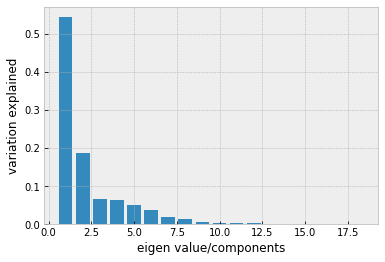

In [824]:
plt.bar(list(range(1,19)),pca_to_learn_variance.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")
plt.show()

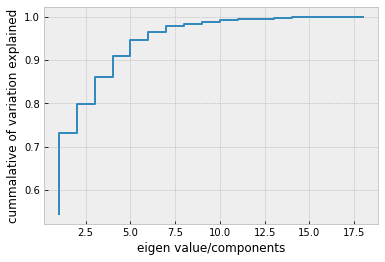

In [825]:
plt.step(list(range(1,19)),np.cumsum(pca_to_learn_variance.explained_variance_ratio_))
plt.xlabel("eigen value/components")
plt.ylabel("cummalative of variation explained")
plt.show()

In [826]:
#use first 8 principal components
pca_eight_components = PCA(n_components=0.95)
pca_eight_components.fit(new_vehicle_df_independent_attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [827]:
#transform the raw data which is in 18 dimension into 0.98 new dimension with pca
new_vehicle_df_pca_independent_attr = pca_eight_components.transform(new_vehicle_df_independent_attr_scaled)

In [828]:
#display the shape of new_vehicle_df_pca_independent_attr
new_vehicle_df_pca_independent_attr.shape


(811, 7)

In [829]:
#now split the data into 70:30 ratio
rawdata_X_train,rawdata_X_test,rawdata_y_train,rawdata_y_test = train_test_split(new_vehicle_df_independent_attr_scaled,new_vehicle_df_dependent_attr,test_size=0.30,random_state=1)
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(new_vehicle_df_pca_independent_attr,new_vehicle_df_dependent_attr,test_size=0.30,random_state=1)

In [830]:
print("shape of rawdata_X_train",rawdata_X_train.shape)
print("shape of rawdata_y_train",rawdata_y_train.shape)
print("shape of rawdata_X_test",rawdata_X_test.shape)
print("shape of rawdata_y_test",rawdata_y_test.shape)
print("--------------------------------------------")
print("shape of pca_X_train",pca_X_train.shape)
print("shape of pca_y_train",pca_y_train.shape)
print("shape of pca_X_test",pca_X_test.shape)
print("shape of pca_y_test",pca_y_test.shape)

shape of rawdata_X_train (567, 18)
shape of rawdata_y_train (567,)
shape of rawdata_X_test (244, 18)
shape of rawdata_y_test (244,)
--------------------------------------------
shape of pca_X_train (567, 7)
shape of pca_y_train (567,)
shape of pca_X_test (244, 7)
shape of pca_y_test (244,)


In [831]:

data_frame = new_vehicle_df_independent_attr_scaled
labels = rawdata_y_train
true_labels = labels




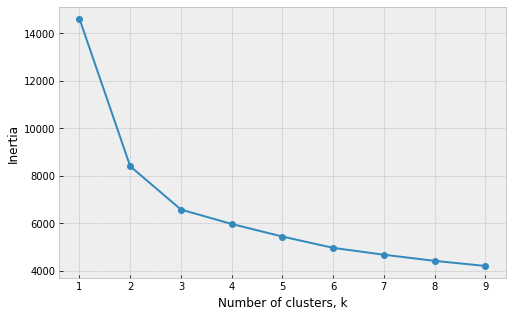

In [832]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_frame)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

There is a bend from 3

In [833]:
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [834]:
def k_means(n_clust, data_frame, true_labels):
    """
    Function k_means applies k-means clustering alrorithm on dataset and prints the crosstab of cluster and actual labels 
    and clustering performance parameters.
    
    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels
    
    Output:
    1 - crosstab of cluster and actual labels
    2 - performance table
    """
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
         homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

In [835]:
k_means(n_clust=3, data_frame=Data, true_labels=Labels)

orig_label     0   1    2
clust_label              
0            200  40    0
1            127  81  104
2             71  74   81

inertia  homo    compl   v-meas   ARI     AMI     silhouette
6265   0.135   0.128   0.132   0.096   0.126    0.292


In [836]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels)

orig_label     0    1    2
clust_label               
0            217   47    0
1            181  148  185

inertia  homo    compl   v-meas   ARI     AMI     silhouette
8019   0.145   0.234   0.179   0.069   0.144    0.378


In [837]:
sup_vec = svm.SVC(gamma = 'scale')
sup_vec.fit(rawdata_X_train, rawdata_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [838]:
# make and test some predictions!!
predictions = sup_vec.predict(rawdata_X_test)
sklearn.metrics.confusion_matrix(rawdata_y_test,predictions)

array([[118,   1,   3],
       [  0,  64,   0],
       [  2,   1,  55]], dtype=int64)

In [839]:
sup_vec = svm.LinearSVC(max_iter=1000000)
sup_vec.fit(rawdata_X_train, rawdata_y_train)
predictions = sup_vec.predict(rawdata_X_test)
sklearn.metrics.confusion_matrix(rawdata_y_test,predictions)

array([[119,   3,   0],
       [  3,  61,   0],
       [  1,   1,  56]], dtype=int64)

In [840]:




sup_vec_C = svm.SVC(gamma = 'scale')
sup_vec_C.fit(rawdata_X_train, rawdata_y_train)
predictions = sup_vec_C.predict(rawdata_X_test)
sklearn.metrics.confusion_matrix(rawdata_y_test,predictions)

array([[118,   1,   3],
       [  0,  64,   0],
       [  2,   1,  55]], dtype=int64)

In [841]:
sup_vec_L = svm.LinearSVC(max_iter=1000000)
sup_vec_L.fit(rawdata_X_train, rawdata_y_train)
predictions = sup_vec_L.predict(rawdata_X_test)
sklearn.metrics.confusion_matrix(rawdata_y_test,predictions)

array([[119,   3,   0],
       [  3,  61,   0],
       [  1,   1,  56]], dtype=int64)

In [842]:
# does the SVC think it fitted correctly? 0 means no problem, 1 means problem
print("RBF: "+str(sup_vec_C.fit_status_))

RBF: 0


R Square Score
SVM RBF               0.832157
RandomForest          0.768763
Bagging               0.759334
AdaBoost              0.681745
Ridge                 0.680342
Bayesian Ridge        0.680093
Lasso                 0.678602
Linear                0.678063
Hubber                0.668769
SVM Linear            0.665894

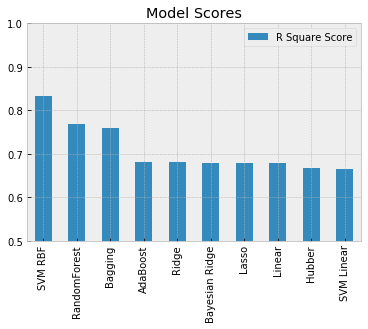

In [843]:
# R2 Score

def lets_try(rawdata_X_train, rawdata_y_train):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, rawdata_X_train, rawdata_y_train, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort_values(by=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    

    return results

lets_try(rawdata_X_train, rawdata_y_train)

Now, let's try the same but using data with PCA applied.

R Square Score
SVM RBF               0.696305
RandomForest          0.586218
Bagging               0.572366
AdaBoost              0.486432
Bayesian Ridge        0.233947
Ridge                 0.231226
Lasso                 0.231094
Linear                0.231057
Hubber                0.207425
SVM Linear            0.162745

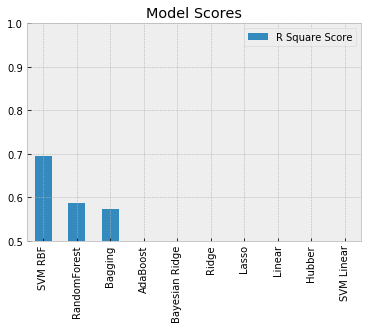

In [844]:
lets_try(pca_X_train, pca_y_train)

In [845]:
cv = KFold(n_splits=3,shuffle=True,random_state=45)

parameters = {'alpha': [1000,100,10],
              'epsilon' : [1.2,1.25,1.50],
              'tol' : [1e-10]}

clf = linear_model.HuberRegressor()
r2 = make_scorer(r2_score)
grid_obj = GridSearchCV(clf, parameters, cv=cv,scoring=r2)
grid_fit = grid_obj.fit(pca_X_train, pca_y_train)
best_clf = grid_fit.best_estimator_ 

best_clf.fit(pca_X_train, pca_y_train)

HuberRegressor(alpha=100, epsilon=1.5, fit_intercept=True, max_iter=100,
        tol=1e-10, warm_start=False)

In [846]:
svc_model = SVC()

In [847]:
svc_model.fit(rawdata_X_train,rawdata_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [848]:
predict=svc_model.predict(rawdata_X_test)

In [849]:
svc_model.fit(pca_X_train,pca_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [850]:
#predict the y value
predict_pca=svc_model.predict(pca_X_test)

In [851]:
#display accuracy score of both models
print("Accuracy score with raw data(18 dimension)",accuracy_score(rawdata_y_test,predictions))
print("Accuracy score with pca data(7 dimension)",accuracy_score(pca_y_test,predict_pca))

Accuracy score with raw data(18 dimension) 0.9672131147540983
Accuracy score with pca data(7 dimension) 0.9385245901639344


In [852]:
from sklearn.metrics import confusion_matrix,classification_report

In [853]:
print(confusion_matrix(rawdata_y_test,predict))

[[118   1   3]
 [  0  64   0]
 [  2   1  55]]


In [854]:
print(classification_report(rawdata_y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       122
           1       0.97      1.00      0.98        64
           2       0.95      0.95      0.95        58

   micro avg       0.97      0.97      0.97       244
   macro avg       0.97      0.97      0.97       244
weighted avg       0.97      0.97      0.97       244



In [855]:
from sklearn.model_selection import GridSearchCV

In [856]:
param_grid = {'C': [0.01,0.05, 0.5, 1], 'gamma': [1,0.1,0.01,0.001]} 

In [857]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(rawdata_X_train,rawdata_y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [858]:
grid_predictions = grid.predict(rawdata_X_test)

In [859]:
print(confusion_matrix(rawdata_y_test,grid_predictions))

[[121   1   0]
 [  0  64   0]
 [  4   1  53]]


In [860]:
print(classification_report(rawdata_y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       122
           1       0.97      1.00      0.98        64
           2       1.00      0.91      0.95        58

   micro avg       0.98      0.98      0.98       244
   macro avg       0.98      0.97      0.97       244
weighted avg       0.98      0.98      0.98       244



Accuracy score with raw data(18 dimension) 0.9672131147540983

Accuracy score with pca data(7 dimension) 0.9385245901639344